# Creating and Backtesting EMA Strategies

# Creating and Backtesting EMA Strategies

## Getting the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
#####################################
import seaborn as sns
sns.set()
#####################################
import datetime as dt
import yfinance as yf
#####################################
from scipy.optimize import brute

In [ ]:
ticker = "CHFUSD=X"

In [ ]:
df = yf.download(tickers=ticker , period = "max" , multi_level_index=False)
df.to_csv(str(ticker)+".csv")
df = pd.read_csv(str(ticker)+".csv" , index_col=[0], parse_dates=[0])
data = df.rename({"Close":"Price"}, inplace=True , axis = "columns")
data = df.Price.copy().to_frame()
data

/tmp/ipython-input-1160593145.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=ticker , period = "max" , multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


,Price
Date,
2003-09-17,0.724270
2003-09-18,0.721605
2003-09-19,0.731582
2003-09-22,0.739208
2003-09-23,0.735998
...,...
2026-02-06,1.285843
2026-02-09,1.288942
2026-02-10,1.303577


In [ ]:
#data = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [ ]:
data.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5826 entries, 2003-09-17 to 2026-02-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   5826 non-null   float64
dtypes: float64(1)
memory usage: 91.0 KB


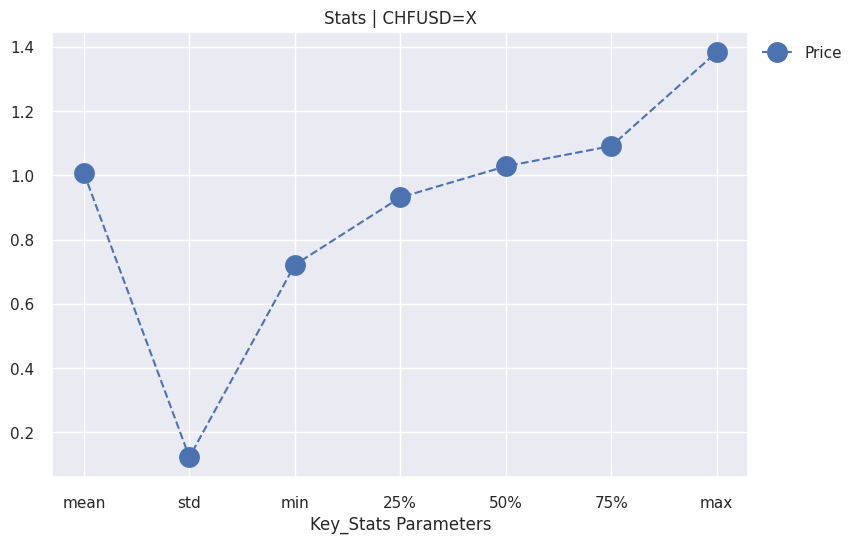

In [ ]:
data.describe().iloc[1:].plot(marker ="o" ,ms = 15 , ls ="--")
plt.title(f"Stats | {ticker}")
plt.xlabel("Key_Stats Parameters")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

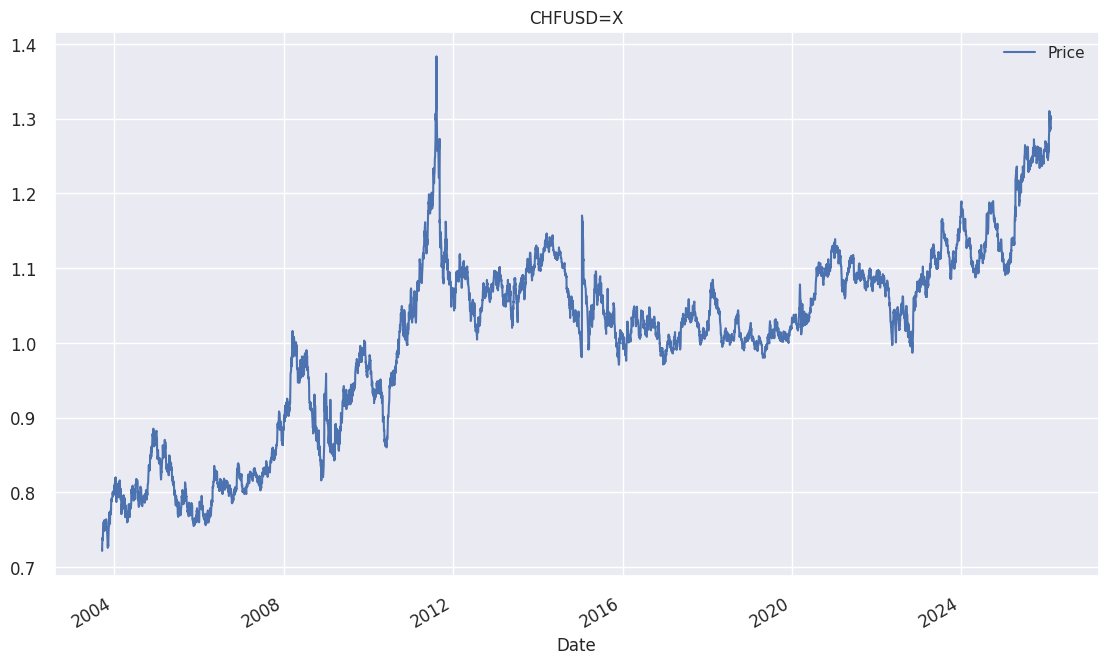

In [ ]:
data.plot(figsize = (12, 8), title = f"{ticker}", fontsize = 12)
plt.show()

## EMA vs. SMA

In [ ]:
data

,Price
Date,
2003-09-17,0.724270
2003-09-18,0.721605
2003-09-19,0.731582
2003-09-22,0.739208
2003-09-23,0.735998
...,...
2026-02-06,1.285843
2026-02-09,1.288942
2026-02-10,1.303577


In [ ]:
window = 50

In [ ]:
data.Price.ewm(span = window, min_periods = window).mean()

,Price
Date,
2003-09-17,NaN
2003-09-18,NaN
2003-09-19,NaN
2003-09-22,NaN
2003-09-23,NaN
...,...
2026-02-06,1.267034
2026-02-09,1.267893
2026-02-10,1.269293


In [ ]:
data["EMA_S"] = data.Price.ewm(span = window, min_periods = window).mean()

In [ ]:
data["SMA_S"] = data.Price.rolling(window).mean()

In [ ]:
data

,Price,EMA_S,SMA_S
Date,,,
2003-09-17,0.724270,NaN,NaN
2003-09-18,0.721605,NaN,NaN
2003-09-19,0.731582,NaN,NaN
2003-09-22,0.739208,NaN,NaN
2003-09-23,0.735998,NaN,NaN
...,...,...,...
2026-02-06,1.285843,1.267034,1.262272
2026-02-09,1.288942,1.267893,1.263160
2026-02-10,1.303577,1.269293,1.264374


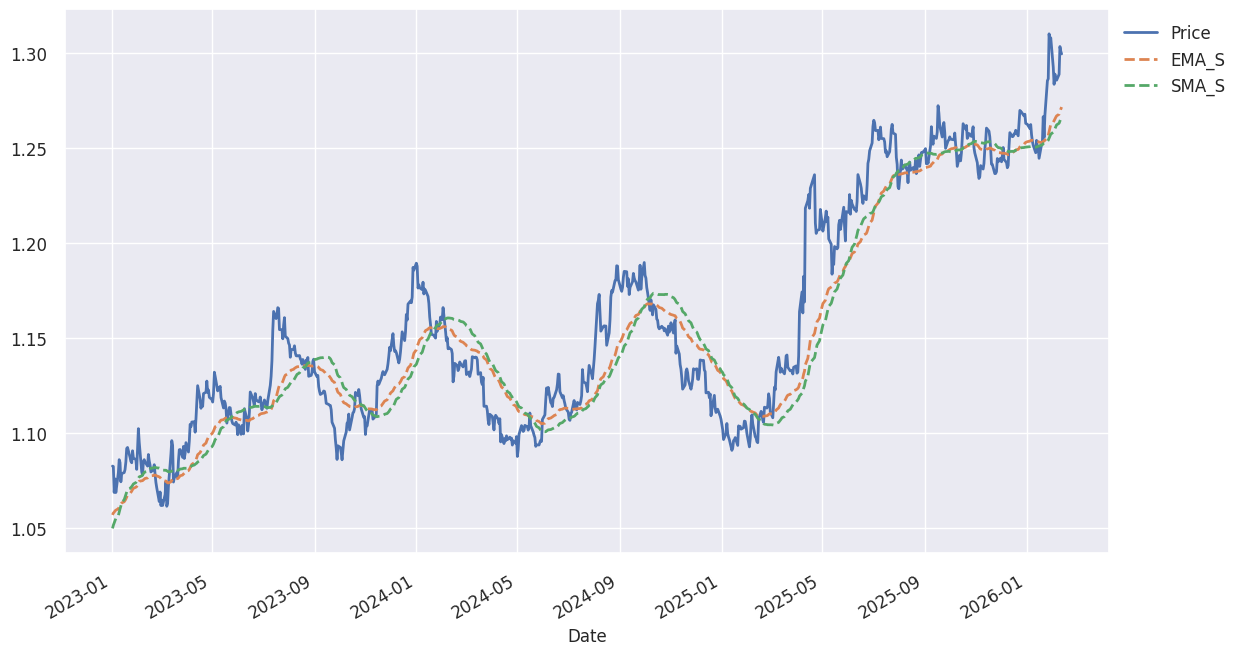

In [ ]:
data.loc["2023":].plot(figsize = (12, 8), fontsize = 12 , style = ["-","--","--"], lw = 2)
plt.legend(fontsize = 12 , bbox_to_anchor = (1,1))
plt.show()

## Defining an EMA Crossover Strategy

In [ ]:
data.drop(columns = ["EMA_S", "SMA_S"], inplace = True)

In [ ]:
data

,Price
Date,
2003-09-17,0.724270
2003-09-18,0.721605
2003-09-19,0.731582
2003-09-22,0.739208
2003-09-23,0.735998
...,...
2026-02-06,1.285843
2026-02-09,1.288942
2026-02-10,1.303577


In [ ]:
ema_s = 50
ema_l = 200

In [ ]:
data["EMA_S"] = data.Price.ewm(span = ema_s , min_periods=ema_s).mean()
data["EMA_L"] = data.Price.ewm(span = ema_l , min_periods=ema_l).mean()
data.head()

,Price,EMA_S,EMA_L
Date,,,
2003-09-17,0.724270,NaN,NaN
2003-09-18,0.721605,NaN,NaN
2003-09-19,0.731582,NaN,NaN
2003-09-22,0.739208,NaN,NaN
2003-09-23,0.735998,NaN,NaN


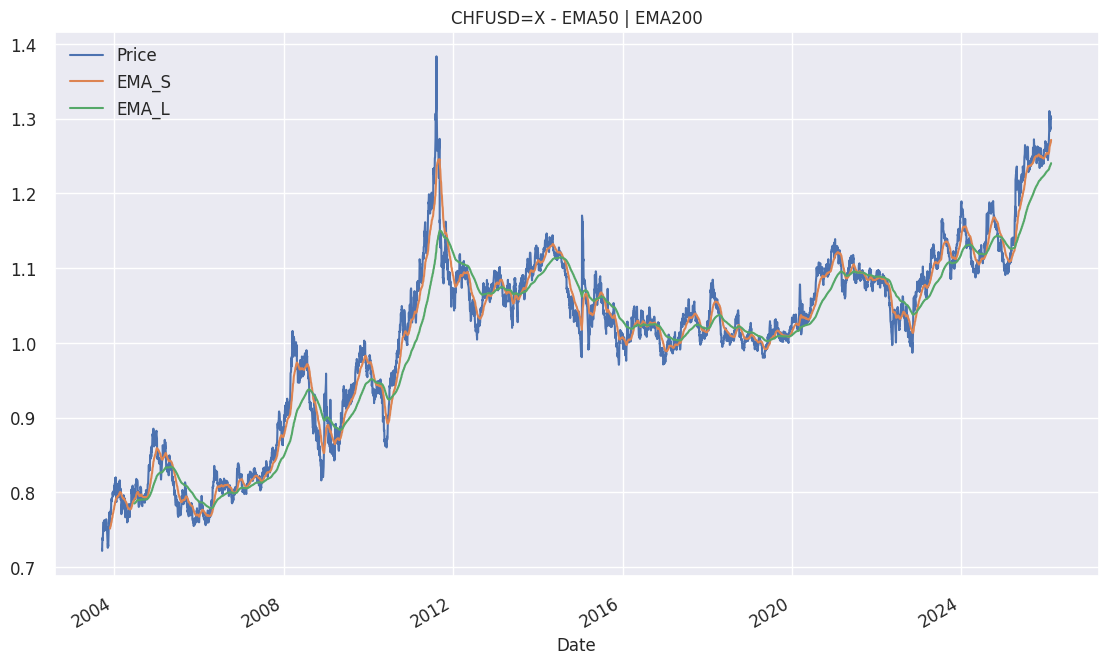

In [ ]:
data.plot(figsize = (12, 8), title = "{} - EMA{} | EMA{}".format(ticker , ema_s, ema_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

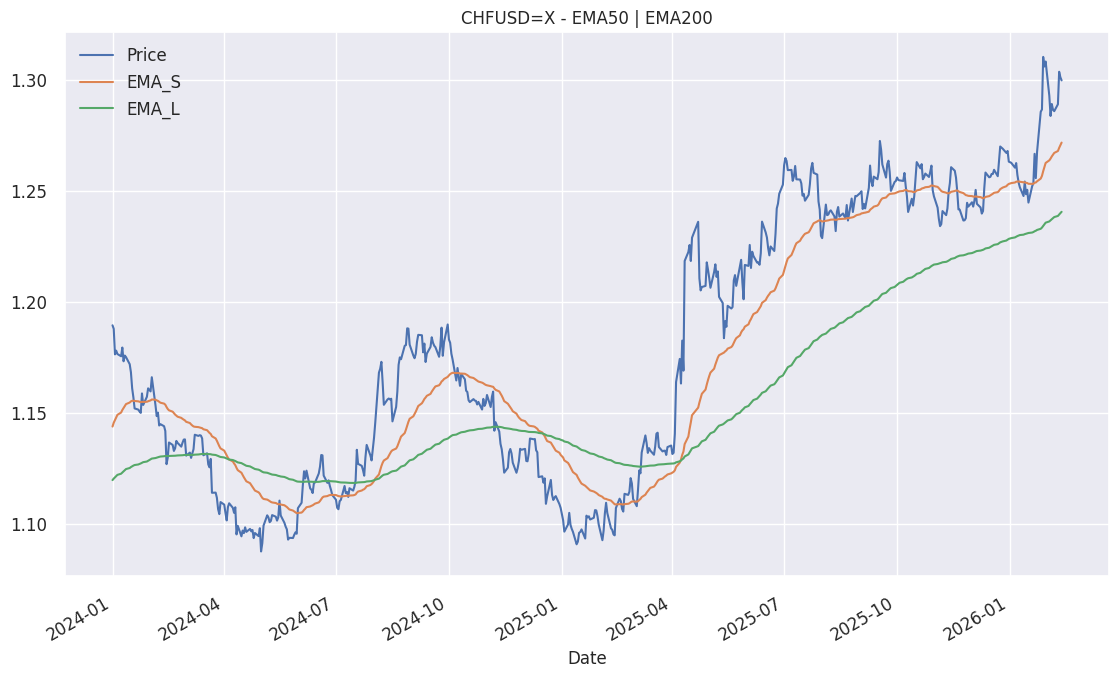

In [ ]:
data.loc["2024":, ["Price", "EMA_S", "EMA_L"]].plot(figsize = (12, 8),
                                                    fontsize = 12,
                                                    title = "{} - EMA{} | EMA{}".format(ticker , ema_s, ema_l))
plt.legend(fontsize = 12)
plt.show()

In [ ]:
data["Position"] = np.where(data["EMA_S"]>data["EMA_L"] , +1 , -1 )
data.head()

,Price,EMA_S,EMA_L,Position
Date,,,,
2003-09-17,0.724270,NaN,NaN,-1
2003-09-18,0.721605,NaN,NaN,-1
2003-09-19,0.731582,NaN,NaN,-1
2003-09-22,0.739208,NaN,NaN,-1
2003-09-23,0.735998,NaN,NaN,-1


In [ ]:
data.query("Position == +1")

,Price,EMA_S,EMA_L,Position
Date,,,,
2004-06-22,0.801154,0.790165,0.784958,1
2004-06-23,0.797830,0.790466,0.785106,1
2004-06-24,0.803665,0.790984,0.785319,1
2004-06-25,0.801925,0.791413,0.785509,1
2004-06-28,0.800705,0.791777,0.785683,1
...,...,...,...,...
2026-02-06,1.285843,1.267034,1.238147,1
2026-02-09,1.288942,1.267893,1.238652,1
2026-02-10,1.303577,1.269293,1.239298,1


In [ ]:
#data["SAME"] = (data["EMA_S"] == data["EMA_L"])

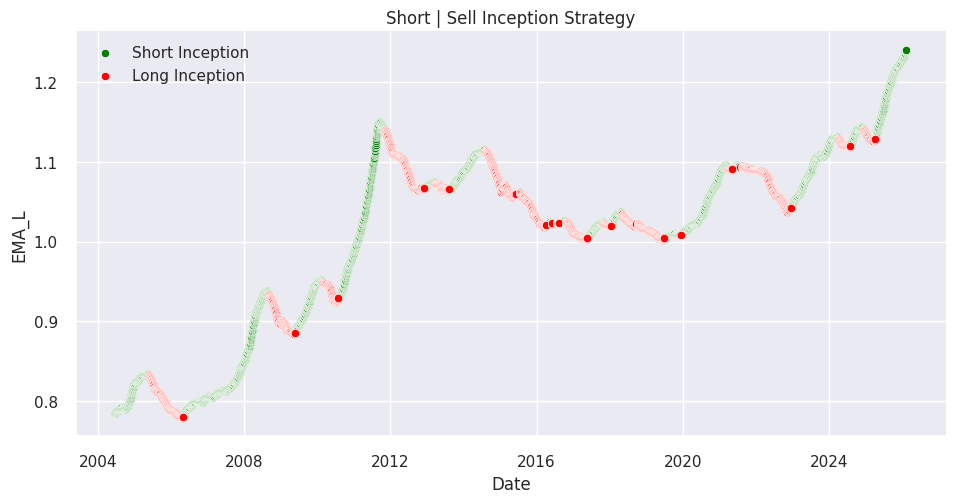

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = data.query("Position == +1") ,
                x = data.query("Position == +1").index ,
                y = "EMA_L", color ="green",
                label = "Short Inception")

sns.scatterplot(data = data.query("Position == -1") ,
                x = data.query("Position == -1").index ,
                y = "EMA_L", color ="red" ,
                label = "Long Inception")

plt.title("Short | Sell Inception Strategy")
plt.legend()
sns.despine()

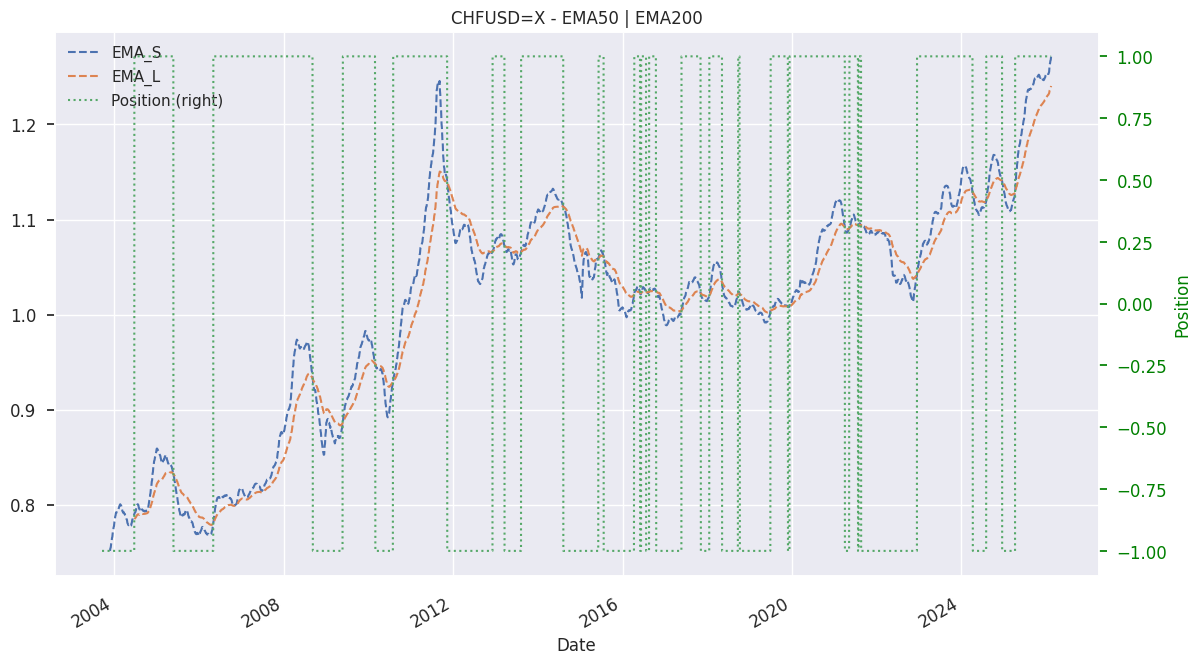

In [ ]:
data.loc[:,["EMA_S" , "EMA_L" , "Position"]].plot(figsize = (12,8),
                                                         fontsize = 12,
                                                         secondary_y="Position",
                                                         style = ["--","--",":"],
                                                         title = "{} - EMA{} | EMA{}".format(ticker , ema_s , ema_l))
plt.tick_params(axis = "y" , color = "green" , labelcolor ="green" )
plt.ylabel("Position" , color = "green")
plt.show()

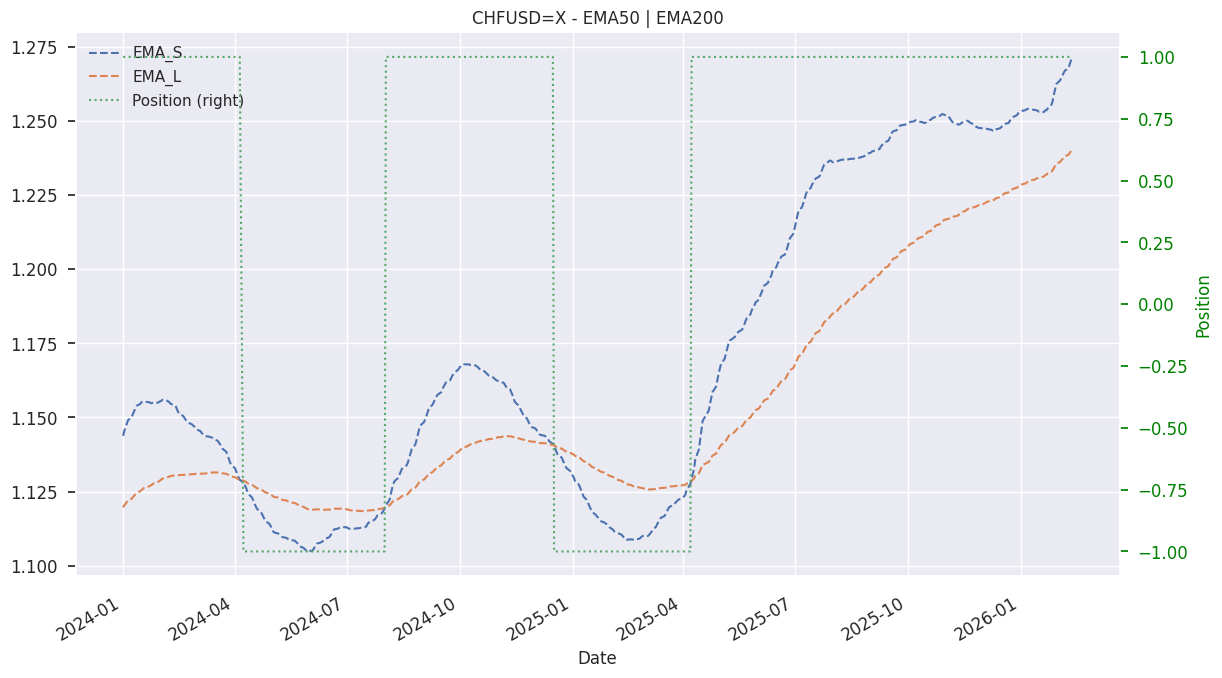

In [ ]:
start_date = "2024"
end_date = None
data.loc[start_date:, ["EMA_S" , "EMA_L" , "Position"]].plot(figsize = (12,8),
                                                         fontsize = 12,
                                                         secondary_y="Position",
                                                         style = ["--","--",":"],
                                                         title = "{} - EMA{} | EMA{}".format(ticker , ema_s , ema_l))
plt.tick_params(axis = "y" , color = "green" , labelcolor ="green" )
plt.ylabel("Position" , color = "green")
plt.show()

## Vectorized Strategy Backtesting

In [ ]:
data.head()

,Price,EMA_S,EMA_L,Position
Date,,,,
2003-09-17,0.724270,NaN,NaN,-1
2003-09-18,0.721605,NaN,NaN,-1
2003-09-19,0.731582,NaN,NaN,-1
2003-09-22,0.739208,NaN,NaN,-1
2003-09-23,0.735998,NaN,NaN,-1


In [ ]:
data["Return"] = np.log(data.Price.div(data.Price.shift(periods=1)))
data.dropna(inplace=True)

In [ ]:
data

,Price,EMA_S,EMA_L,Position,Return
Date,,,,,
2004-06-22,0.801154,0.790165,0.784958,1,-0.002406
2004-06-23,0.797830,0.790466,0.785106,1,-0.004157
2004-06-24,0.803665,0.790984,0.785319,1,0.007287
2004-06-25,0.801925,0.791413,0.785509,1,-0.002167
2004-06-28,0.800705,0.791777,0.785683,1,-0.001523
...,...,...,...,...,...
2026-02-06,1.285843,1.267034,1.238147,1,-0.000502
2026-02-09,1.288942,1.267893,1.238652,1,0.002407
2026-02-10,1.303577,1.269293,1.239298,1,0.011290


In [ ]:
data["Strategy"] = data.Position.shift(periods=1) * data.Return
data.dropna(inplace = True)

In [ ]:
data

,Price,EMA_S,EMA_L,Position,Return,Strategy
Date,,,,,,
2004-06-23,0.797830,0.790466,0.785106,1,-0.004157,-0.004157
2004-06-24,0.803665,0.790984,0.785319,1,0.007287,0.007287
2004-06-25,0.801925,0.791413,0.785509,1,-0.002167,-0.002167
2004-06-28,0.800705,0.791777,0.785683,1,-0.001523,-0.001523
2004-06-29,0.790889,0.791742,0.785742,1,-0.012335,-0.012335
...,...,...,...,...,...,...
2026-02-06,1.285843,1.267034,1.238147,1,-0.000502,-0.000502
2026-02-09,1.288942,1.267893,1.238652,1,0.002407,0.002407
2026-02-10,1.303577,1.269293,1.239298,1,0.011290,0.011290


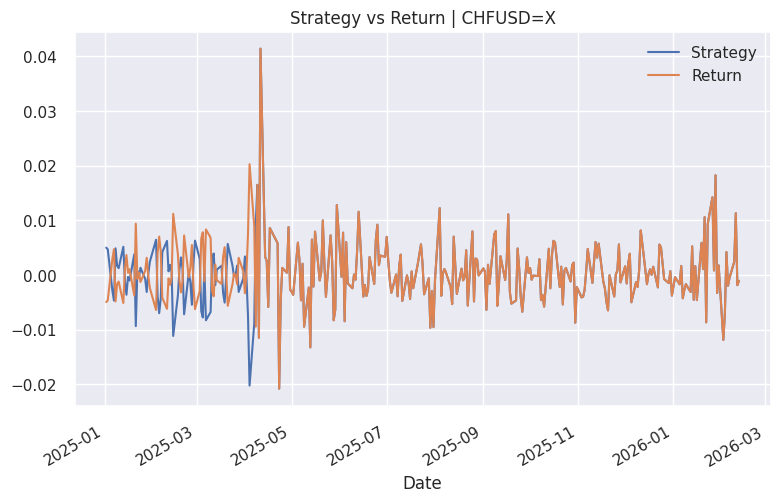

In [ ]:
data.loc["2025":,["Strategy", "Return"]].plot(title="Strategy vs Return | {}".format(ticker))
plt.show()

In [ ]:
ptc = 0.00007

In [ ]:
data["Trade"] = data.Position.diff(periods=1).fillna(value = 0).abs()

In [ ]:
data.Trade.value_counts(normalize=False)

,count
Trade,
0.0,5588
2.0,38


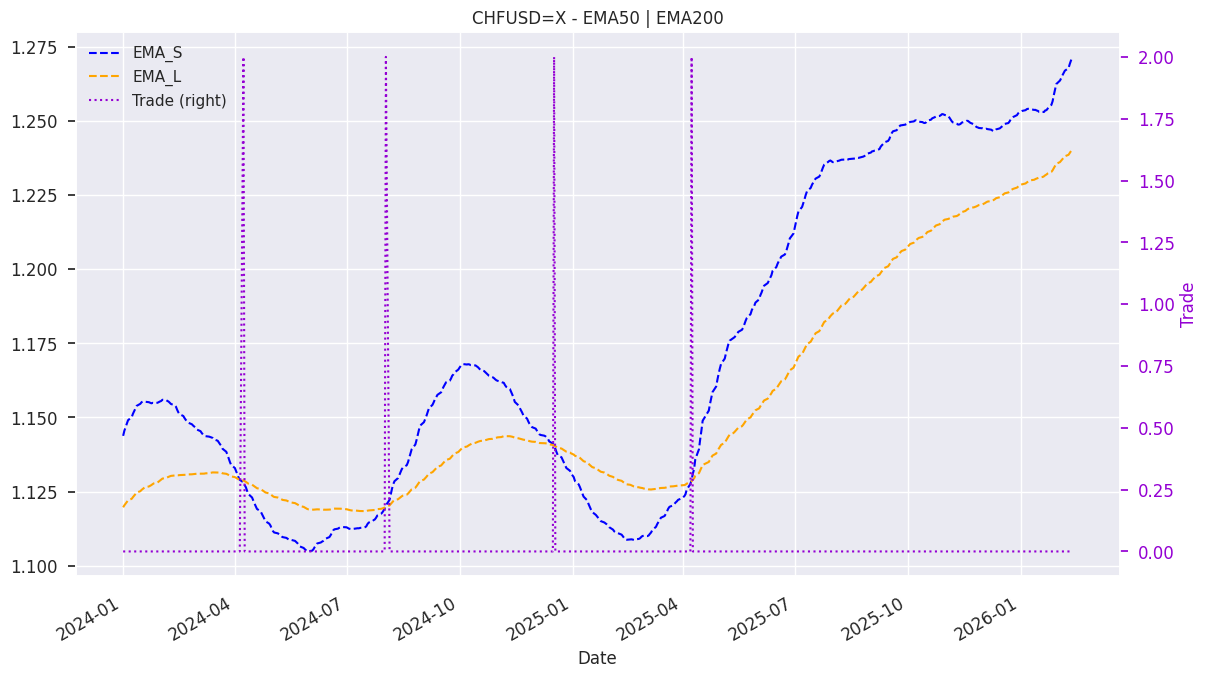

In [ ]:
start_date = "2024"
end_date = None
data.loc[start_date:, ["EMA_S" , "EMA_L" ,"Trade"]].plot(figsize = (12,8),
                                                         fontsize = 12,
                                                         secondary_y="Trade",
                                                         style = ["--","--",":"],
                                                         color = ["blue","orange","darkviolet"],
                                                         title = "{} - EMA{} | EMA{}".format(ticker , ema_s , ema_l))
plt.tick_params(axis = "y" , color = "darkviolet" , labelcolor ="darkviolet" )
plt.ylabel("Trade" , color = "darkviolet")
plt.show()

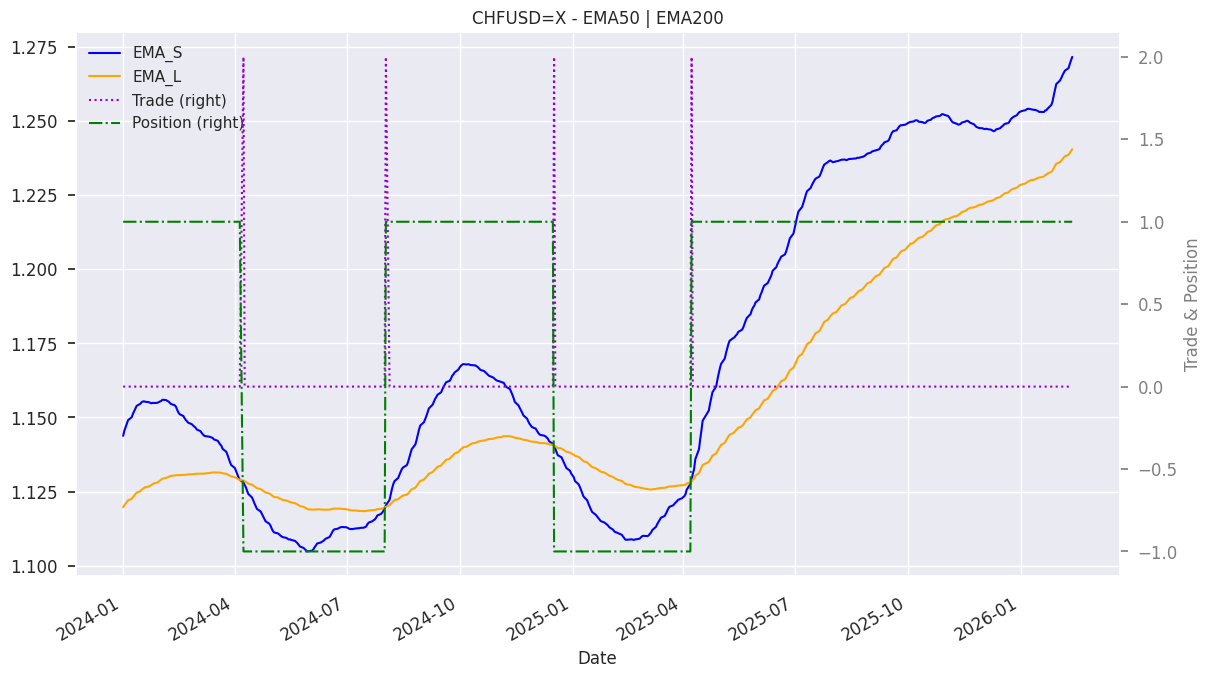

In [ ]:
start_date = "2024"
end_date = None
data.loc[start_date:, ["EMA_S" , "EMA_L" ,"Trade","Position"]].plot(figsize = (12,8),
                                                         fontsize = 12,
                                                         secondary_y=["Trade","Position"],
                                                         style = ["-","-",":","-."],
                                                         color = ["blue","orange","darkviolet","green"],
                                                         title = "{} - EMA{} | EMA{}".format(ticker , ema_s , ema_l))
plt.tick_params(axis = "y" , color = "gray" , labelcolor ="gray" )
plt.ylabel("Trade & Position", color="gray")
plt.show()

In [ ]:
data["Strategy_Net"] = data.Strategy - data.Trade * ptc

In [ ]:
data["Creturn"] = data.Return.cumsum().apply(np.exp)
data["Cstrategy"] = data.Strategy.cumsum().apply(np.exp)
data["Cstrategy_Net"] = data.Strategy_Net.cumsum().apply(np.exp)

In [ ]:
data.head()

,Price,EMA_S,EMA_L,Position,Return,Strategy,Trade,Strategy_Net,Creturn,Cstrategy,Cstrategy_Net
Date,,,,,,,,,,,
2004-06-23,0.797830,0.790466,0.785106,1,-0.004157,-0.004157,0.0,-0.004157,0.995851,0.995851,0.995851
2004-06-24,0.803665,0.790984,0.785319,1,0.007287,0.007287,0.0,0.007287,1.003134,1.003134,1.003134
2004-06-25,0.801925,0.791413,0.785509,1,-0.002167,-0.002167,0.0,-0.002167,1.000962,1.000962,1.000962
2004-06-28,0.800705,0.791777,0.785683,1,-0.001523,-0.001523,0.0,-0.001523,0.999440,0.999440,0.999440
2004-06-29,0.790889,0.791742,0.785742,1,-0.012335,-0.012335,0.0,-0.012335,0.987188,0.987188,0.987188


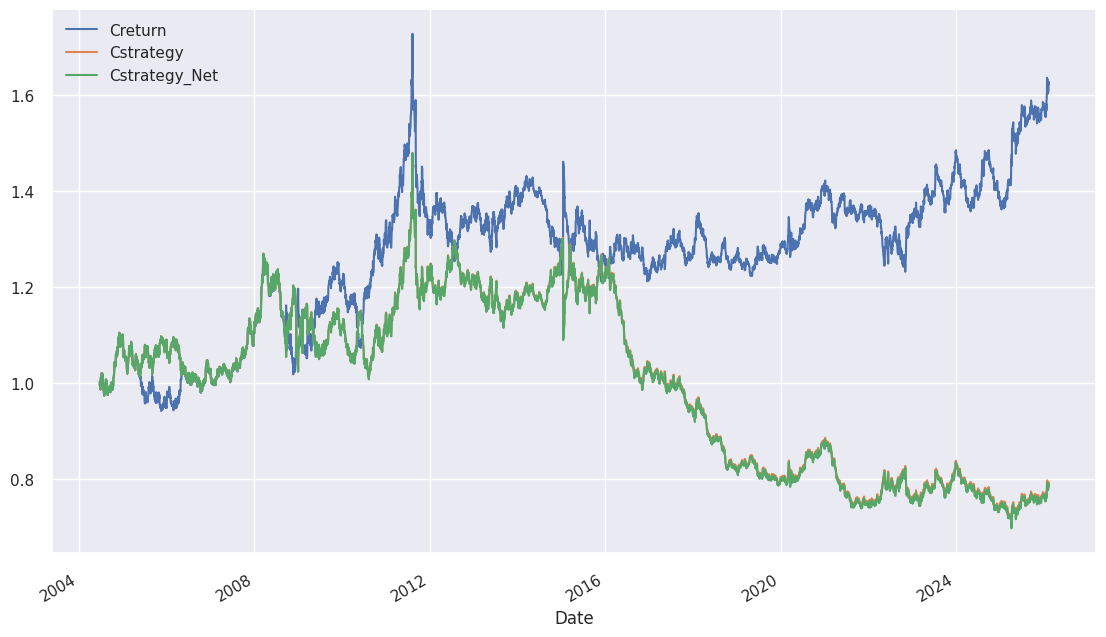

In [ ]:
data[["Creturn", "Cstrategy", "Cstrategy_Net"]].plot(figsize = (12 , 8))
plt.show()

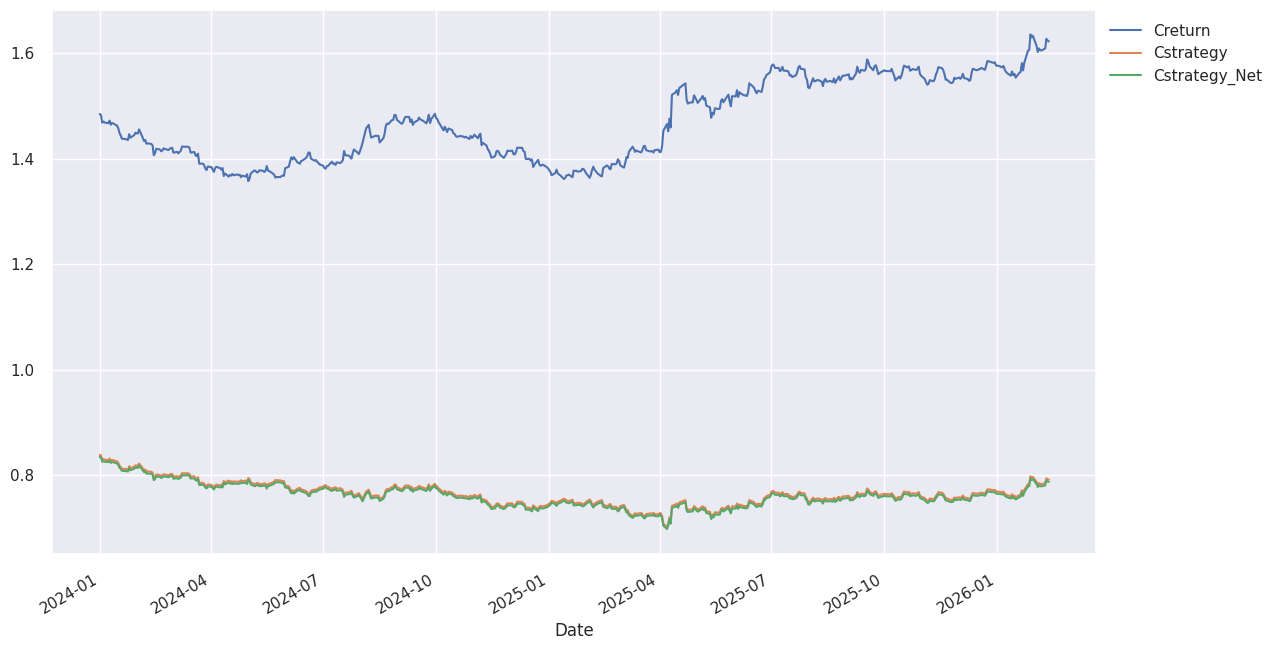

In [ ]:
data.loc["2024":, ["Creturn", "Cstrategy", "Cstrategy_Net"]].plot(figsize = (12 , 8))
plt.legend(bbox_to_anchor = (1,1))
plt.show()